## K Means Clustering

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X,y = make_blobs(n_samples=1000, centers=3,n_features=2)

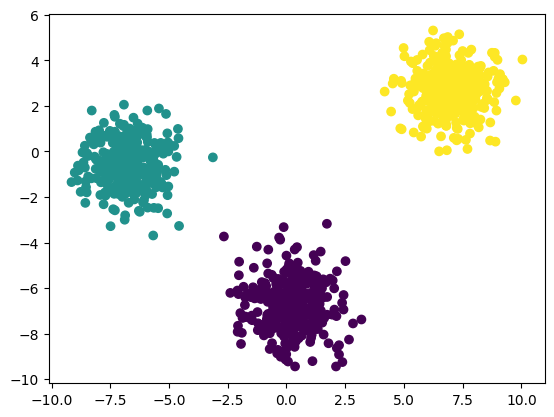

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
## Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [7]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [8]:
from sklearn.cluster import KMeans


In [10]:
## Elbow method
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init = "k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

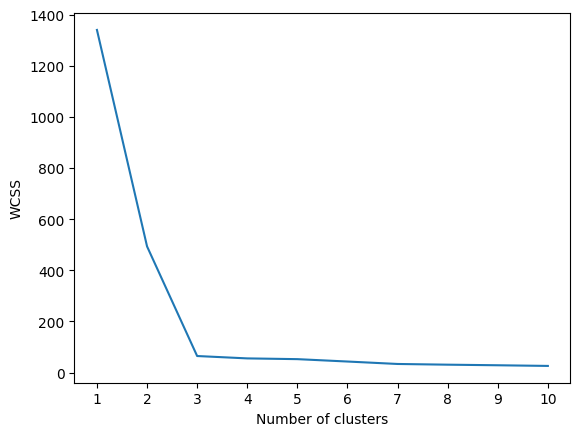

In [11]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [20]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1,
       0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2,
       2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1,
       2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0,
       0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2,
       1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0,
       1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2,
       2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,

In [21]:
y_pred = kmeans.predict(X_test_scale)

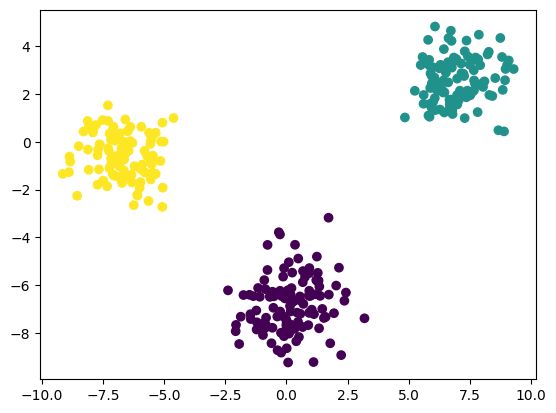

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [23]:
## Validating with knee locator

In [24]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [26]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve = "convex", direction = "decreasing")

In [27]:
kl.elbow

3

In [28]:
## silhoutte score
from sklearn.metrics import silhouette_score
silhouteecoeff = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouteecoeff.append(score)

In [29]:
silhouteecoeff

[0.6452751567319688,
 0.8157235642300426,
 0.6546499469787538,
 0.5262100363906469,
 0.3750060754102946,
 0.5104613091418916,
 0.3362500919654222,
 0.2929897978064648,
 0.3364310546407704]

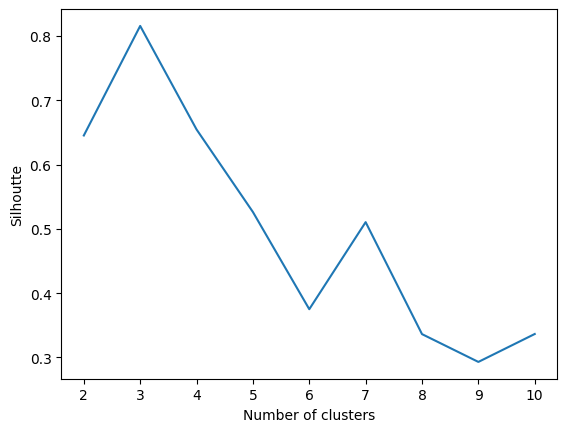

In [31]:
plt.plot(range(2,11),silhouteecoeff)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte")
plt.show()